Dataset collected from https://drive.google.com/drive/folders/1vdr9CC9ChYVW2iXp6PlfyMOGD-4Um1ue which contains images of fresh cotton leaf, fresh cotton plants, diseased cotton leaf and diseased cotton plant.

#### Upload Dataset from Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Import Required Libraries

In [2]:
import tensorflow
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

####  Save Training & Validation Data Path and Provide Input Image Size

In [3]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/test'

## Model1 : ResNet152V2 

In [9]:
#using imagenet weights
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

234545216/234545216 [==============================] - 1s 0us/step


In [10]:
# not train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [11]:
#number of output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/train/*')

In [12]:
folders

['/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/train/fresh cotton leaf',
 '/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/train/diseased cotton plant',
 '/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/train/fresh cotton plant',
 '/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/train/diseased cotton leaf']

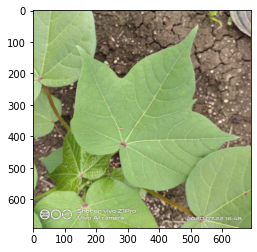

In [4]:
img_path = '/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/train/fresh cotton leaf/d (1)_iaip.jpg'
img = plt.imread(img_path)
# Plot the image
plt.imshow(img)
plt.show()


#### Flattens the output of the ResNet152V2 convolutional neural network.

In [13]:
x = Flatten()(resnet152V2.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)
model_resnet152v2 = Model(inputs=resnet152V2.input, outputs=prediction)

In [15]:
model_resnet152v2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [16]:
model_resnet152v2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

#### Data Augmentation

In [17]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_r152 = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen_r152 = ImageDataGenerator(rescale = 1./255)

In [18]:
# same target size as initialied for the image size
training_set_r152 = train_datagen_r152.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [19]:
test_set_r152 = test_datagen_r152.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 370 images belonging to 4 classes.


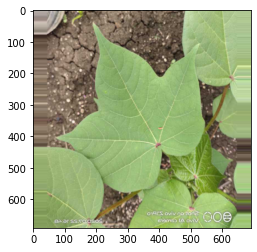

In [20]:
img = plt.imread(img_path)
img = np.expand_dims(img, axis=0)
augmented_img = train_datagen_r152.flow(img)
#show augmented image
plt.imshow(augmented_img[0][0])
plt.show()

In [ ]:

r1 = model_resnet152v2.fit_generator(
  training_set_r152,
  validation_data=test_set_r152,
  epochs=15,
  steps_per_epoch=len(training_set_r152),
  validation_steps=len(test_set_r152)
)

<ipython-input-15-886e6209ee35>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r1 = model_resnet152v2.fit_generator(


Epoch 1/15
61/61 [==============================] - 1291s 21s/step - loss: 1.7284 - accuracy: 0.8078 - val_loss: 0.2803 - val_accuracy: 0.9541
Epoch 2/15
61/61 [==============================] - 46s 743ms/step - loss: 0.4091 - accuracy: 0.9298 - val_loss: 0.2345 - val_accuracy: 0.9595
Epoch 3/15
61/61 [==============================] - 46s 753ms/step - loss: 0.3603 - accuracy: 0.9380 - val_loss: 0.3046 - val_accuracy: 0.9595
Epoch 4/15
61/61 [==============================] - 46s 743ms/step - loss: 0.3259 - accuracy: 0.9513 - val_loss: 0.5909 - val_accuracy: 0.9405
Epoch 5/15
61/61 [==============================] - 50s 806ms/step - loss: 0.3709 - accuracy: 0.9585 - val_loss: 0.1698 - val_accuracy: 0.9622
Epoch 6/15
61/61 [==============================] - 47s 777ms/step - loss: 0.2842 - accuracy: 0.9651 - val_loss: 0.1089 - val_accuracy: 0.9784
Epoch 7/15
61/61 [==============================] - 49s 804ms/step - loss: 0.2757 - accuracy: 0.9626 - val_loss: 0.2478 - val_accuracy: 0.9703

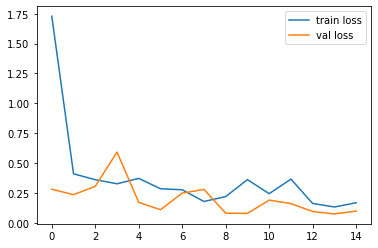

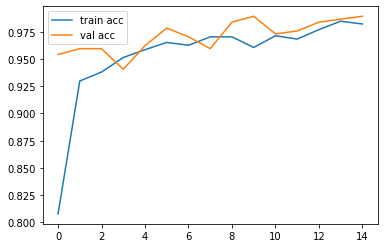

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_resnet152v2')

# plot the accuracy
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_resnet152v2')

### Save Model

In [ ]:
from tensorflow.keras.models import load_model

model_resnet152v2.save('model_resnet152V2.h5')

In [ ]:
y_pred = model_resnet152v2.predict(test_set_r152)

12/12 [==============================] - 9s 480ms/step


In [ ]:
y_pred

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.1040698e-22, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [4.8262311e-23, 1.9001624e-26, 1.0000000e+00, 0.0000000e+00],
       ...,
       [3.3579207e-05, 3.7710999e-15, 5.4331096e-18, 9.9996638e-01],
       [1.2137023e-31, 1.5513904e-38, 1.0000000e+00, 6.5105062e-22],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 2, 2, 1, 1, 3, 0, 1, 3, 3, 3, 0, 3, 3, 0, 1, 1, 1, 0, 3, 3, 1,
       0, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 3, 3, 3, 2, 1, 1, 2, 2, 1, 1, 2,
       3, 2, 0, 0, 1, 1, 1, 0, 0, 3, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 3,
       1, 1, 3, 1, 2, 2, 3, 1, 3, 3, 3, 2, 3, 3, 2, 0, 0, 3, 1, 1, 3, 1,
       3, 2, 0, 0, 1, 0, 0, 2, 3, 0, 3, 0, 0, 1, 0, 2, 1, 3, 1, 0, 0, 3,
       0, 1, 2, 1, 1, 1, 3, 1, 0, 1, 0, 3, 0, 1, 2, 3, 0, 3, 3, 2, 3, 3,
       0, 1, 2, 1, 2, 2, 3, 0, 1, 1, 2, 1, 3, 2, 3, 2, 3, 3, 0, 3, 1, 1,
       2, 0, 0, 0, 1, 2, 3, 2, 1, 2, 0, 3, 0, 2, 1, 1, 1, 3, 1, 0, 3, 0,
       2, 2, 0, 0, 3, 3, 0, 0, 0, 2, 1, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2,
       3, 0, 3, 1, 1, 0, 0, 2, 3, 0, 3, 2, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1,
       3, 1, 2, 2, 3, 1, 2, 2, 0, 2, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 3, 2, 2, 0, 0, 0, 0, 2, 3, 3, 1, 1, 2, 3, 1,
       1, 3, 3, 1, 1, 3, 3, 1, 3, 2, 3, 1, 1, 1, 2, 3, 0, 3, 1, 2, 2, 2,
       3, 0, 1, 3, 2, 2, 1, 1, 2, 1, 0, 1, 3, 2, 1,

## Model2 : Inception V3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
for layer1 in inception.layers:
    layer1.trainable = False

In [ ]:
x1 = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x1)
model_inception = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model_inception.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:

train_datagen_inception = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen_inception = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set_inception = train_datagen_inception.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set_inception = test_datagen_inception.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 370 images belonging to 4 classes.


In [ ]:
r2 = model_inception.fit_generator(
  training_set_inception,
  validation_data=test_set_inception,
  epochs=15,
  steps_per_epoch=len(training_set_inception),
  validation_steps=len(test_set_inception)
)

<ipython-input-33-ca4171736742>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r2 = model_inception.fit_generator(


Epoch 1/15
61/61 [==============================] - 54s 803ms/step - loss: 1.7712 - accuracy: 0.7499 - val_loss: 0.9648 - val_accuracy: 0.8432
Epoch 2/15
61/61 [==============================] - 44s 724ms/step - loss: 0.6438 - accuracy: 0.8883 - val_loss: 0.3474 - val_accuracy: 0.9324
Epoch 3/15
61/61 [==============================] - 44s 720ms/step - loss: 0.5965 - accuracy: 0.9052 - val_loss: 0.3291 - val_accuracy: 0.9297
Epoch 4/15
61/61 [==============================] - 44s 724ms/step - loss: 0.3647 - accuracy: 0.9298 - val_loss: 0.3542 - val_accuracy: 0.9270
Epoch 5/15
61/61 [==============================] - 45s 740ms/step - loss: 0.4134 - accuracy: 0.9313 - val_loss: 0.3629 - val_accuracy: 0.9216
Epoch 6/15
61/61 [==============================] - 45s 731ms/step - loss: 0.6038 - accuracy: 0.9175 - val_loss: 0.3314 - val_accuracy: 0.9405
Epoch 7/15
61/61 [==============================] - 42s 690ms/step - loss: 0.4869 - accuracy: 0.9329 - val_loss: 0.5431 - val_accuracy: 0.9108

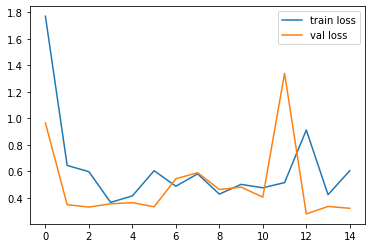

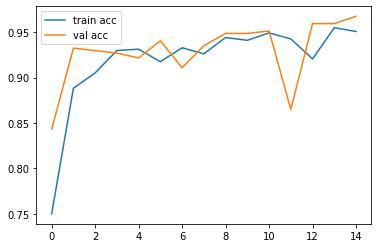

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r2.history['loss'], label='train loss')
plt.plot(r2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_inception')

# plot the accuracy
plt.plot(r2.history['accuracy'], label='train acc')
plt.plot(r2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_inception')

In [ ]:
model_inception.save('model_inception.h5')

## Model 3 : Resnet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
for layer2 in resnet.layers:
    layer2.trainable = False

In [ ]:
x2 = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x2)
model_resnet50 = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model_resnet50.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_datagen_r50 = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen_r50 = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set_r50 = train_datagen_r50.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set_r50 = test_datagen_r50.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset_cotton/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 370 images belonging to 4 classes.


In [ ]:
r3 = model_resnet50.fit_generator(
  training_set_r50,
  validation_data=test_set_r50,
  epochs=15,
  steps_per_epoch=len(training_set_r50),
  validation_steps=len(test_set_r50)
)

<ipython-input-47-364d3c5b2910>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r2 = model_resnet50.fit_generator(


Epoch 1/15
61/61 [==============================] - 48s 737ms/step - loss: 2.8905 - accuracy: 0.4106 - val_loss: 1.2067 - val_accuracy: 0.5541
Epoch 2/15
61/61 [==============================] - 44s 725ms/step - loss: 1.0815 - accuracy: 0.5700 - val_loss: 0.9321 - val_accuracy: 0.5595
Epoch 3/15
61/61 [==============================] - 43s 706ms/step - loss: 0.9922 - accuracy: 0.6110 - val_loss: 2.3290 - val_accuracy: 0.4054
Epoch 4/15
61/61 [==============================] - 43s 704ms/step - loss: 0.9113 - accuracy: 0.6494 - val_loss: 0.6453 - val_accuracy: 0.7784
Epoch 5/15
61/61 [==============================] - 43s 709ms/step - loss: 0.9391 - accuracy: 0.6315 - val_loss: 0.6222 - val_accuracy: 0.7459
Epoch 6/15
61/61 [==============================] - 43s 702ms/step - loss: 0.9038 - accuracy: 0.6602 - val_loss: 1.2978 - val_accuracy: 0.5811
Epoch 7/15
61/61 [==============================] - 43s 698ms/step - loss: 0.8040 - accuracy: 0.6802 - val_loss: 0.7990 - val_accuracy: 0.7189

In [ ]:
model_resnet50.save('model_resnet50.h5')